In [3]:
#Ricardo Valle Bassanesi 16/11/2024

#pelo enunciado é autorizado a usar libs não vistas em aula,

from datetime import datetime, date, timedelta #vou suar a datatime.datetime para converter e já validar o campo data
from statistics import mean #calcular a média, pdoia fazer tbm sum(dados) / len(dados)
import matplotlib.pyplot as plt #gráficos

plt.style.use('_mpl-gallery') #estilo do matplotlib

#funções de apoio, já que no enunciado é solicitado para organizarmos por função

def ler_arquivo(origem:str = 'dados.csv') -> tuple[list, list]: #sempre se retorno um objeto, nesse caso uma tupla

  arquivo = open(origem, 'r') #abre o csv em modo leitura

  dados = [] #abre a lista fazia para preencher com o arquvio aberto acima

  for linha in arquivo: #itera cada linha do arquivo

    linha = linha.strip() #strip aqui é usado para remover o \n, mas tbm poderia remover os espaços em branco, como o  trim no sql
    dados.append(linha.split(',')) #adiciona cada linha à lsita dados e tbm já faz o split, quebrando o texto de cada linha em uma lista

  arquivo.close() #fecha o arquivo, se n me engano, se usasssemos o

  cabecalho = dados[0] #pega o primeiro elemento da lista (que é o cabeçalho)
  dados = dados[1:] #pega os demais items da lista (tira o cabeçalho)

  return cabecalho, dados

def converter_dados(dados:list) -> tuple[list, date, date]:

  #vai trazer os dados convertidos e tbm a data máxima e mínima

  dados_convertidos = []#abre a lista vazia para preencher ela

  data_max = None
  data_min = None

  for entrada in dados: #itera cada dia

    data = datetime.strptime(entrada[0], '%d/%m/%Y').date() #converte o campo 0 para data

    #teste para traze a data máxima
    if data_max is None: #isso é pro ciclo inicial
      data_max = data
    elif data > data_max: #teste posteriores
      data_max = data

    #teste para trazer a data mínima
    if data_min is None: #isso é pro ciclo inicial
      data_min = data
    elif data < data_min: #teste posteriores
      data_min = data

    campos = entrada[1:] #segrega os camplos numéricos
    campos = [float(campo) for campo in campos] #converte os campos numéricos em float com abrangencia de lista

    dados_convertidos.append([data] + campos) #devolve a entrada toda junto para a nova lista

  #retorno a data_max e min em formatos mais legíveis

  data_max = datetime.strftime(data_max, '%m/%Y') #usando a lib datetime.datetime importada
  data_min = datetime.strftime(data_min, '%m/%Y') #usando a lib datetime.datetime importadas
  return dados_convertidos, data_max, data_min

def validar_data(data: str) -> str:

  #teste se a data é válida
  #usa a máxima de é melhor pedir perdão que permissão, e assim usamos o try/except
  #que enquanto não foi visto ainda no curso, é bem útil

  while True:

    try:
      #tenta converter, se der certo vai pro break e cai fora do loop
      #caso contrário vai pro except e pergunta novamente
      data = datetime.strptime(data, '%m/%Y').date()
      break
    except:
      print('precisa ser mês / ano!')
      data = input('Data inválida, digite novamente: ')

  return data

def filtrar_dados(dados:list, inicio:date, fim:date):

  dados_filtrados = []

  for entrada in dados:

    #faz o teste de datas
    #data é o campo 0
    data = entrada[0]

    if data < inicio or data >= fim: #fim é maior ou igual
      continue

    dados_filtrados.append(entrada)

  return dados_filtrados

def validar_visao(grupos: list, descData:dict) -> list:

  visao = None #precisa iniciar para não dar erro

  while visao not in list(range(0, len(grupos) + 1)): #teste pra visao ser valida

    visao = input(f'Digite de 0 a {len(grupos)}: ')

    try:
      visao = int(visao)
    except:
      print('não é um número!')

    #fica tentando até pegar uma visao válida

  if visao == 0:
    visao_detalhada = list(range(0, len(descData))) #traz uma lista com todas as n colunas de 0 a n -1
  else:
    visao_detalhada = [0] #sempre traz a data
    grupo = grupos[visao - 1] #pega o grupo, como o total é o zero, tem que subtrair 1

    for chave, valor in descData.items():

      if valor['grupo'] == grupo:
        visao_detalhada.append(valor['ordem'])

  return visao_detalhada

def imprimir_dados(cabecalho:list, dados_filtrados:list, visao_detalhada:list) -> None:

  #mostra o cabeçalho com um tab (\t) em cada um, o join é o inverso do split, enquanto o split separa cada elemento
  #de um texto por um sperador em uma lista, o join une uma lista com um "juntador" (nessa caso um \t) num texto

  #filtra só as colunas que vieram no visao detalhada
  ordem = 0
  cabecalho_aj = []

  for coluna in cabecalho:
    if ordem in visao_detalhada:

      if coluna == 'data': coluna += ' ' * 6 #ajuste no cabeçalho data, que fica menor que os demais

      cabecalho_aj.append(coluna)
    ordem += 1

  print('\t'.join(cabecalho_aj))

  for entrada in dados_filtrados: #itera cada dia

    entrada_aj = []

    data = entrada[0]
    data = data.strftime('%d/%m/%Y') #converte a data em texto de volta para mostrar
    entrada = entrada[1:] #segrega os númeris pra converter pra texto novamente,
    #converto para ficar melhor de mostrar (o decimal) e tbm pra usar no join
    entrada = [str(valor).replace('.', ',') for valor in entrada]
    entrada = [data] + entrada

    #isso tudo para deixar a coluna de valores com o mesmo cumprimento de cada cabeçalho
    #teria sido mais fácil fazer com um pandas, mas assim é um desafio a mais

    ordem = 0 #esse ordem é pra ir pegando a largura de cada coluna no ehader
    #tbm daria pra usar um enumerate

    for valor in entrada:

      if ordem not in visao_detalhada:
        ordem += 1
        continue

      cumprimento = len(cabecalho[ordem]) #pega o tamanho desse campo no cabeçalho
      recuo = cumprimento - len(valor)

      #não faz sentido austar se o recuo for negativo
      if recuo < 0: recuo = 0
      valor += ' ' * recuo #adiciona o ' ' recuso vezes
      ordem += 1

      entrada_aj.append(valor)

    print('\t'.join(entrada_aj)) #cuidar a identação para não dar print/return a data iteração do va

  return

def soma_mensal(dados:list, coluna:int = 1) -> tuple[str, float]:

  anomeses = {} #dicionário

  #precipitação é a segunda coluna

  for entrada in dados:

    data = entrada[0]
    anomes = data.strftime('%Y%m') #converte a data pra anomes (AAAAMM)
    precipitacao = entrada[coluna]

    try:
      #se já tem a chave do anomes, adiciona
      anomeses[anomes] += precipitacao
    except:
      #se ainda nçao tem, cria
      anomeses[anomes] = precipitacao

  meses = sorted(anomeses, key=lambda x: anomeses[x])

  mes_maior_precipitacao = meses[-1]
  valor_maior_precipicacao = anomeses[meses[-1]]

  mes_maior_precipitacao = datetime.strptime(mes_maior_precipitacao, '%Y%m') #converte de texto em data
  mes_maior_precipitacao = mes_maior_precipitacao.strftime('%m/%Y') #converte de data em texto

  return mes_maior_precipitacao, valor_maior_precipicacao

def media_mensal(dados:list, mes:int, coluna:int = 3) -> list:

  ano_min = 2006 #são fixos
  ano_max = 2016 #são fixos

  anomeses = {} #dicionário

  #precipitação é a segunda coluna

  for entrada in dados:

    data = entrada[0]

    if data.year < 2006 or data.year > 2016:
      continue

    if data.month != mes:
      continue

    anomes = data.strftime('%Y%m') #converte a data pra anomes (AAAAMM)
    valor = entrada[coluna]

    try:
      #se já tem a chave do anomes, adiciona
      anomeses[anomes] += [valor]
    except:
      #se ainda nçao tem, cria
      anomeses[anomes] = [valor]

  #salvou em listas

  for chave, valor in anomeses.items():

    anomeses[chave] = mean(valor) #faz a média

  return anomeses

def imprimir_tem_min(mes_extenso: str, dados_temp_min: list) -> str:

  print(f'Temperatura mínima média para {mes_extenso} de 2006 a 2016')

  #já vamos aproveitar o laço no dict para pegar o valor médio geral pedido no item 5
  valores = []

  for chave, valor in dados_temp_min.items():
    valor_aj = str(round(valor, 2)).replace('.', ',')
    print(f'{chave} - {valor_aj}')
    valores.append(valor)

  valor_medio = mean(valores) #calcula a média
  valor_medio = str(round(valor_medio, 2)).replace('.', ',') #deixan para uma maneira mais apresentável

  return valor_medio

def graf_min(dados_temp_min: dict) -> None:

  x = list(dados_temp_min.keys()) #os valores nas absciassas
  y = list(dados_temp_min.values()) #o valor das ornedas

  plt.figure(figsize=(8,4)) #8 por 4 polegadas
  plt.bar(x,y, label='Temp. mínima') #gráfico de barras, o default plot traria de linha

  plt.xlabel('Ano-mês') #título eixo x
  plt.ylabel('Temperatura') #título eixo y
  plt.title('Temperatura mínima média') #título gráfico
  plt.legend() #adiciona legenda

  #mostra o gráfico
  plt.show()

  return

def graf_amp_term(dados_temp_med: dict, dados_temp_min:dict, dados_temp_max:dict) -> None:

  x = list(dados_temp_med.keys()) #os valores nas absciassas
  y = list(dados_temp_med.values()) #o valor das ornedas
  y_min = list(dados_temp_min.values()) #o valor das ornedas
  y_max = list(dados_temp_max.values()) #o valor das ornedas

  fig, ax = plt.subplots(figsize=(8,4)) #8 por 4 polegadas
  ax.plot(x, y, label='Temp. média')
  ax.fill_between(x, y_min, y_max, alpha=0.1, label='Amplitude térmica')

  plt.xlabel('Ano-mês') #título eixo x
  plt.ylabel('Temperatura') #título eixo y
  plt.title('Temperatura média média') #título gráfico
  ax.legend() #adiciona legenda

  #mostra o gráfico
  plt.show()

  return

lendo dados
converterndo dados
Escolha o perído desejado, há dados entre 01/1961 e 06/2016
Digite o período inicial ex: 01/1988: 01/1977
Digite o período final ex: 01/1988: 01/1977
Agora escolha os dados que quer ver
0 - Para Tudo
1 - Para Chuva + Calor
2 - Para Umidade + Vento
3 - Para Temperatura
Digite de 0 a 3: 3

os dados são :
data      	maxima	minima	temp_media
01/01/1977	27,3  	14,0  	20,0      
02/01/1977	26,2  	10,8  	27,4      
03/01/1977	30,5  	19,5  	19,9      
04/01/1977	29,3  	9,4   	25,7      
05/01/1977	20,5  	17,6  	23,6      
06/01/1977	31,6  	9,6   	14,1      
07/01/1977	29,5  	24,2  	16,9      
08/01/1977	29,1  	13,8  	18,3      
09/01/1977	38,0  	17,5  	22,3      
10/01/1977	36,8  	7,0   	23,4      
11/01/1977	29,1  	8,4   	22,8      
12/01/1977	28,4  	11,9  	15,7      
13/01/1977	31,3  	19,8  	19,5      
14/01/1977	21,8  	18,8  	17,5      
15/01/1977	21,9  	20,9  	21,4      
16/01/1977	29,0  	8,4   	11,6      
17/01/1977	20,2  	18,1  	19,5      
18/01/1977	28,5  

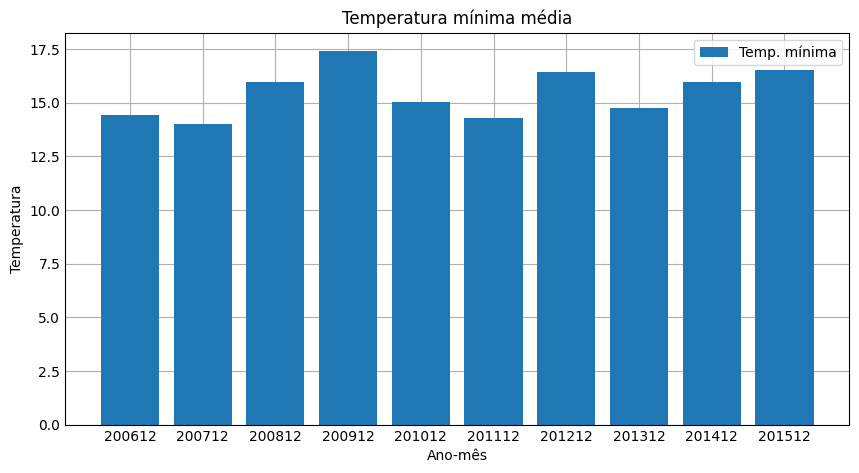


também há o gráfico de amplitute térmica, que relaciona as temperaturas médias, mínima e máxima


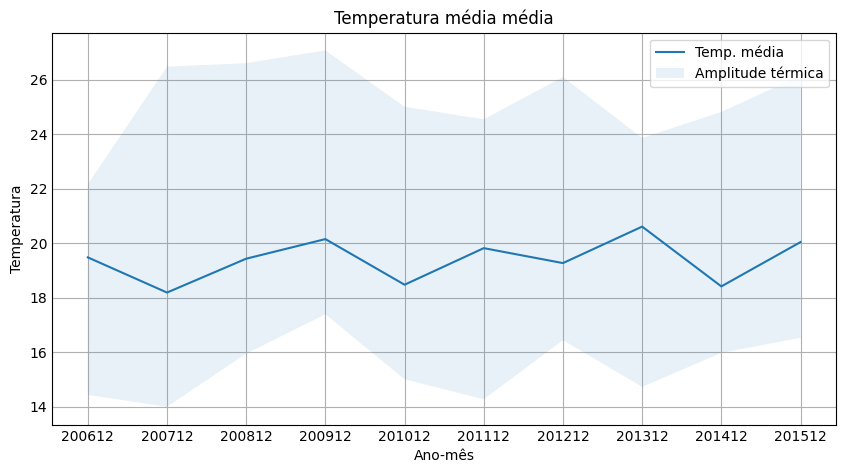


a temperatura mínima média geral é 15,47 para Dezembro


In [5]:
#estruturas de apoio

#esse dicionário de dicionários serve para descrever o que é cada coluna e tbm vai ser útil para o usuário filtrar as ifnos que ele quer
#já que agrupa em macrogrupos
descData = {
    'data':{'nome':'Data', 'grupo': 'DATA', 'ordem':0},
    'precip':{'nome':'Precipitação', 'grupo': 'Chuva + Calor', 'ordem':1},
    'maxima':{'nome':'Temp. Máxima', 'grupo': 'Temperatura', 'ordem':2},
    'minima':{'nome':'Temp. Mínima', 'grupo': 'Temperatura', 'ordem':3},
    'horas_insol':{'nome':'Insolação', 'grupo': 'Chuva + Calor', 'ordem':4},
    'temp_media':{'nome':'Temp. Média', 'grupo': 'Temperatura', 'ordem':5},
    'um_relativa':{'nome':'Umidade Relativa', 'grupo': 'Umidade + Vento', 'ordem':6},
    'vel_vento':{'nome':'Velocidade do Vento', 'grupo': 'Umidade + Vento', 'ordem':7},
}

#meses, não precisa colocar um dict {'Janeiro':1}, pegamos pela posição já
meses_extenso = [
    'Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho',
    'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'
]

#grupos que vão ser ofertados
grupos = []

for chave, valor in descData.items():

  grupos.append(valor['grupo'])

grupos = list(set(grupos)) #transofrma em set para remover duplicados
grupos = [grupo for grupo in grupos if grupo != 'DATA'] #data sempre aparece

print('lendo dados')
cabecalho, dados = ler_arquivo()
print('converterndo dados')
dados, data_max, data_min = converter_dados(dados)

print(f'Escolha o perído desejado, há dados entre {data_min} e {data_max}')
inicio = input('Digite o período inicial ex: 01/1988: ')

inicio = validar_data(inicio)

fim = input('Digite o período final ex: 01/1988: ')
fim = validar_data(fim)

#caso o início seja maior que o fim, inverte
if inicio > fim:
  inicio, fim = fim, inicio

#passa o fim para o dia 1 do mês seguinte
fim = (fim + timedelta(days=35)).replace(day=1)

print('Agora escolha os dados que quer ver')
print('0 - Para Tudo')
ordem = 1
for grupo in grupos:
  print(f'{ordem} - Para {grupo}')
  ordem += 1

visao_detalhada = validar_visao(grupos, descData) #deterima também quas infos o usuário quer, vai trazer uma lista com as colunas
dados_filtrados = filtrar_dados(dados, inicio, fim)

print('')
print('os dados são :')

imprimir_dados(cabecalho, dados_filtrados, visao_detalhada)

print('')
print('processando precipitação')
mes_maior_precipitacao, valor_maior_precipicacao = soma_mensal(dados)
print(f'o ano-mês de maior precipitação é {mes_maior_precipitacao} e o valor é {valor_maior_precipicacao}')

print('')
print('Selecione o mês para as análises de média')

ordem = 1
for mes in meses_extenso:
  print(f'Digite {ordem} para {meses_extenso[ordem - 1]}:')
  ordem += 1

while True:
  try:
    mes = int(input(''))

    if mes < 1 or mes > 12:
      print('precisa ser um número de 1 a 12')
      continue
    break
  except:
    print('precisa ser um número')

dados_temp_min = media_mensal(dados, mes)
dados_temp_max = media_mensal(dados, mes, 2) #pega esses valores extra para o gráfico extra
dados_temp_med = media_mensal(dados, mes, 5) #pega esses valores extra para o gráfico extra

#já traz a média geral para o item 5
media_geral = imprimir_tem_min(meses_extenso[mes-1], dados_temp_min)

print(f'abaixo há o gráfico de temperatura mínima média no {meses_extenso[mes-1]}')
graf_min(dados_temp_min)

print('')
print(f'também há o gráfico de amplitute térmica, que relaciona as temperaturas médias, mínima e máxima')
graf_amp_term(dados_temp_med, dados_temp_min, dados_temp_max)

print('')
print(f'a temperatura mínima média geral é {media_geral} para {meses_extenso[mes-1]}')

###Instruções Fase 2

Novamente vamos trabalhar com dados meteorológicos, mas agora os dados serão de um arquivo texto.  Nesta fase, você trabalhará com um conjunto de dados¹ (formato csv² em anexo disponibilizado no Material Complementar) contendo informações climáticas diárias do município brasileiro de Porto Alegre, entre os anos 1961 e 2016. O arquivo contém 18.564 registros com os campos: data, precipitação (volume de chuva em milímetros por m2), temperatura máxima (em graus celsius), temperatura mínima (em graus celsius), umidade relativa do ar (% entre 0 e 100) e a velocidade do vento (em m/s).


**Seu programa deve ser capaz de realizar:**


*   Carga e preparação de dados: trabalhar com arquivos de dados, realizando a sua leitura, filtragem das informações relevantes e armazenamento em estruturas de dados adequadas para consulta.
*   Análise e visualização de dados: análises estatísticas diversas sobre os dados armazenados, por meio da implementação de algoritmos e geração de gráficos para a visualização dos resultados.


O código entregue em linguagem Python deve permitir:

Leitura do arquivo: os dados do arquivo devem ser carregados para memória e disponibilizados em uma lista de listas/tuplas/dicionário.
   

**Observações:**


*   É a partir da aula 08 que explicamos como realizar a leitura de arquivo texto e a carga dos dados em listas. No entanto, a manipulação de estruturas de dados está nas aulas anteriores à aula 08. Por isso, é importante você assistir e realizar as práticas na sequência sugerida. Nossos exemplos são todos com arquivo CSV e não há necessidade de uso de bibliotecas específicas, além das abordadas na disciplina. Além das funções de manipulação de arquivo, funções strings, como split, serão essenciais para a carga dos dados em lista/dicionário. **No entanto, você pode usar outras bibliotecas se já conhecê-las.

*   Crie quantas estruturas de dados (listas, dicionários, ...) que você julgar conveniente e não esqueça de organizar seu código em funções.

*   Não modifique o arquivo .csv dado. Seu programa é que deve tratar os dados lidos do arquivo.

*   Comente no seu código decisões tomadas quanto ao tratamento dos dados, mencionando o que você desconsiderou, excluiu ou corrigiu no arquivo. Não use caminhos absolutos para o arquivo .csv, implemente considerando que o arquivo está na mesma pasta do seu programa. Não defina caminhos específicos dentro do seu código para acesso ao arquivo .csv. Se você entregar com caminhos absolutos o trabalho não será avaliado. Considere os exemplos abaixo, caso você não tenha entendido a diferença entre caminho absoluto e caminho relativo. Se mesmo com o exemplo você ainda ficar com dúvida, contate o tutor da disciplina para ele ajudar você.

```
'''
Caminho relativo: O caminho não é explicitamente especificado, significa que será considerado como caminho aquele em que o programa estiver.
'''

arquivo = open('dados.csv', 'r')

'''
Caminho absoluto: O caminho é especificado e o programa só funcionará se esse caminho existir na máquina de quem for executá-lo.
'''

arquivo = open('C:\Desktop\PUCRS\dados.csv', 'r')

```



1.   **Visualização de intervalo de dados em modo texto:** a partir de entradas do usuário, sua implementação deve permitir a visualização dos dados que foram carregados do arquivo. O usuário deve informar o período que quer ver, ou seja, deve indicar o mês e ano iniciais, bem como o mês e ano finais que deseja visualizar os dados. Permita também que o usuário informe se quer ver 1) todos os dados, 2) apenas os de precipitação, 3) apenas os de temperatura, ou 4) apenas os de umidade e vento para o período informado.

**Observações:**

*   Valide os dados de entrada;

*   Você pode escolher a forma de apresentação dos dados, porém não esqueça de incluir um cabeçalho para os dados exibidos.


2.   **Mês mais chuvoso:** o mês/ano com maior precipitação, **considerando todos os dados do arquivo**. Exiba também a maior precipitação na tela juntamente com o mês e o ano. Utilize obrigatoriamente um dicionário e implemente ao menos uma função. Lembre-se de considerar todos os dados do arquivo!


3.   **Média da temperatura mínima de um determinado mês (auge do inverno) nos últimos 11 anos (2006 a 2016):** ano a ano, calcule a temperatura mínima média do mês informado pelo usuário. Implemente esse item, codificando uma função e armazenando os dados em um dicionário. Se o mês informado for agosto, por exemplo, você pode usar como chave o mês combinado com o ano: agosto2006, agosto2007,...; e como valor, você deve apresentar a média da temperatura mínima referente ao mês e ano da chave. Não esqueça de validar a entrada do usuário, o mês deve ser válido.


4.   **Gráfico de barras (vertical ou horizontal) com as médias de temperatura mínima de um determinado mês nos últimos 11 anos.** (2006 a 2016). Gere um gráfico com as médias calculadas do mês informado em cada ano do período conforme o item c. Não esqueça de rotular os eixos e usar legendas para deixar o seu gráfico informativo, legível (altere as cores, se necessário) e bem elaborado.

5.   **Média geral da temperatura mínima de um determinado mês nos últimos 11 anos (2006 a 2016):** percorra o dicionário criado no item c, calcule e exiba a média geral da temperatura para o referido mês.


**O que você precisa entregar:** um .zip contendo o seu código em Python, ou seja, zipe seu .py ou .ipynb e poste na plataforma. Dentro do .zip só pode conter o arquivo em Python, não pode estar dentro de uma pasta. Lembre que seu programa deve executar acessando o arquivo .csv localmente!

**ATENÇÃO AO FORMATO DO ARQUIVO:** Você deve submeter seu arquivo exclusivamente no formato ZIP. Não é possível submeter outros formatos de arquivos compactados, como RAR, por exemplo.